# Example of Hosmer-Lemeshow test

This is an example from the Wikipedia page on the Hosmer-Lemeshow test. "A researcher wishes to know if caffeine improves performance on a memory test. Volunteers consume different amounts of caffeine from 0 to 500 mg, and their score on the memory test is recorded."

In [77]:
import pandas as pd

In [78]:
df = pd.read_csv('HL_data2.csv')
df

,group,caffeine,n_volunteers,A_grade,proportion_A
0,1,0,30,16,0.53
1,2,25,11,7,0.64
2,3,50,15,11,0.73
3,4,75,5,4,0.80
4,5,100,18,16,0.89
5,6,125,5,4,0.80
6,7,150,24,17,0.71
7,8,175,8,5,0.63
8,9,200,12,5,0.42
9,10,225,8,3,0.38


The table has the following columns.

- group: identifier for the 11 treatment groups, each receiving a different dose
- caffeine: mg of caffeine for volunteers in a treatment group
- n_volunteers: number of volunteers in a treatment group
- A_grade: the number of volunteers who achieved an A grade in the memory    test (success)
- proportion_A: the proportion of volunteers who achieved an A grade

## Logistic model of P(A grade) = f(caffeine)

Text(0, 0.5, 'Probability of grade A')

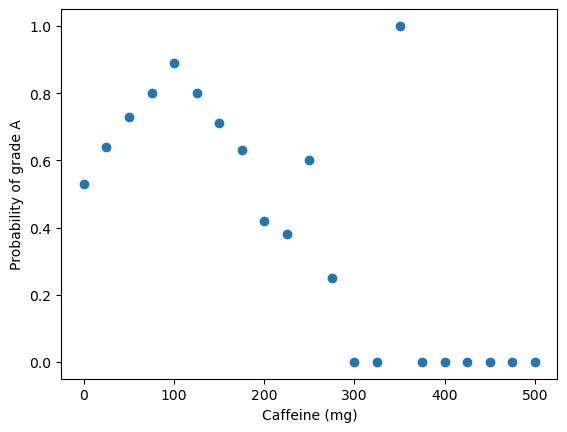

In [79]:
import matplotlib.pyplot as plt

X = df['caffeine'].to_numpy().reshape(-1,1)
y = df['proportion_A']
plt.figure()
plt.scatter(X,y)
plt.xlabel('Caffeine (mg)')
plt.ylabel('Probability of grade A')
 

The data are formatted in a way that cannot directly be used with sklearn (proportions instead of binary results), so we need some reformatting:

In [80]:
import numpy as np
Xf = np.array([])
yf = np.array([])
for i, row in df.iterrows():
    n = int(row['n_volunteers'])
    Xf = np.concatenate([Xf, row['caffeine']*np.ones(n)]) 
    nA = int(row['proportion_A']*n)
    yf = np.concatenate([yf, np.ones(nA)])
    yf = np.concatenate([yf, np.zeros(n-nA)])

In [81]:
idx = np.random.permutation(yf.size)
Xf = Xf[idx]
yf = yf[idx]

In [82]:
from sklearn.linear_model import LogisticRegression
lrm = LogisticRegression().fit(Xf.reshape(-1,1),yf)

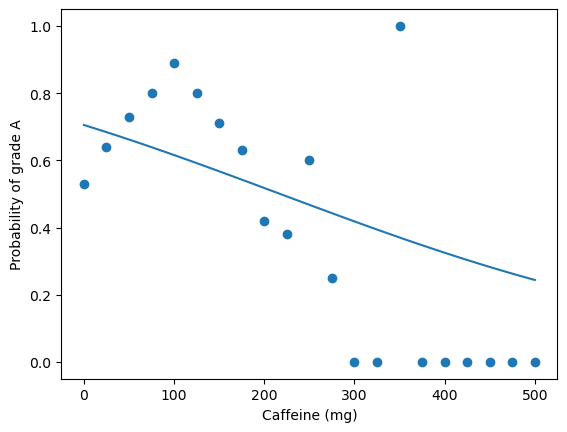

In [83]:
plt.figure()
plt.scatter(X,y)
plt.xlabel('Caffeine (mg)')
plt.ylabel('Probability of grade A')
xtest= np.linspace(0, 500, 100)
proba = lrm.predict_proba(xtest.reshape(-1,1))

plt.plot(xtest, proba[:,1])
plt.show()
 

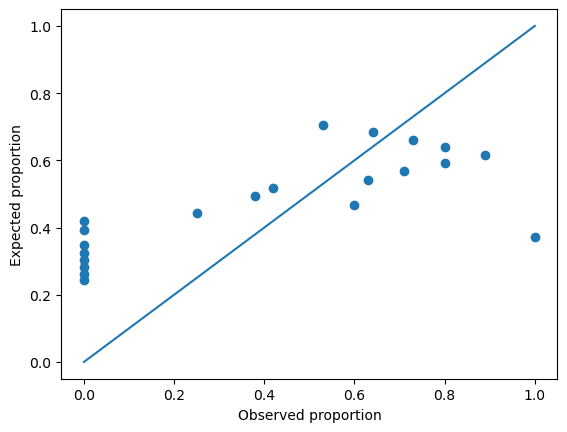

In [84]:
plt.figure()
proba = lrm.predict_proba(X)
expected_prop = proba[:,1]

plt.scatter(y,expected_prop)
plt.plot(np.linspace(0,1,3),np.linspace(0,1,3))
plt.xlabel('Observed proportion')
plt.ylabel('Expected proportion')
 
 
plt.show()
 

"In this caffeine example, there are 30 observations for each dose, which makes calculation of the Pearson chi-squared statistic feasible. Unfortunately, it is common that there are not enough observations for each possible combinations of values of the x variables, so the Pearson chi-squared statistic cannot be readily calculated. A solution to this problem is the Hosmer-Lemeshow statistic. The key concept of the Hosmer-Lemeshow statistic is that, instead of observations being grouped by the values of the x variable(s), the observations are grouped by expected probability. That is, observations with similar expected probability are put into the same group, usually to create approximately 10 groups." (Source: Wikipedia)


The Hosmer–Lemeshow test can determine if the differences between observed and expected proportions are significant, indicating model lack of fit. 

The Hosmer-Lemeshow test statistic is given by:
$$
H=\sum_{g=1}^G\left(\frac{\left(O_{1 g}-E_{1 g}\right)^2}{E_{1 g}}+\frac{\left(O_{0 g}-E_{0 g}\right)^2}{E_{0 g}}\right)=\sum_{g=1}^G\left(\frac{\left(O_{1 g}-E_{1 g}\right)^2}{N_g \pi_g}+\frac{\left(N_g-O_{1 g}-\left(N_g-E_{1 g}\right)\right)^2}{N_g\left(1-\pi_g\right)}\right)=\sum_{g=1}^G \frac{\left(O_{1 g}-E_{1 g}\right)^2}{N_g \pi_g\left(1-\pi_g\right)} .
$$
Here $O_{1 g}, E_{1 g}, O_{0 g}, E_{0 g}, N_g$, and $\pi_g$ denote the observed $Y=1$ events, expected $Y=1$ events, observed $Y=0$ events, expected $Y=0$ events, total observations, predicted risk for the $g^{\text {th }}$ risk decile group, and $G$ is the number of groups. The test statistic asymptotically follows a $\chi^2$ distribution with $G-2$ degrees of freedom. The number of risk groups may be adjusted depending on how many fitted risks are determined by the model. This helps to avoid singular decile groups.

Calculation of the Hosmer-Lemeshow statistic proceeds in 6 steps:

1. Compute p(c = 1) for all n subjects using the logistic regression


In [85]:
dframe = df[['group', 'caffeine']]
 
dframe.loc[:,'Expected_prop'] = expected_prop

/home/tristan/anaconda3/envs/kaggle/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/home/tristan/anaconda3/envs/kaggle/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


2. Order p(c = 1) 

In [86]:
dframe = dframe.sort_values(by = 'Expected_prop', ascending = False)
dframe

,group,caffeine,Expected_prop
0,1,0,0.705117
1,2,25,0.683868
2,3,50,0.661822
3,4,75,0.639050
4,5,100,0.615635
5,6,125,0.591671
6,7,150,0.567264
7,8,175,0.542526
8,9,200,0.517576
9,10,225,0.492538


3. Divide the ordered values into Q percentile groups

In [100]:
Q = 10
categories, bins = pd.cut(dframe['Expected_prop'], np.percentile(dframe['Expected_prop'],np.linspace(0,100,Q+1)),labels=False,include_lowest=True, retbins = True)

In [101]:
bins

array([0.24381995, 0.28262337, 0.32494852, 0.37033998, 0.41814453,
       0.4675379 , 0.51757583, 0.56726375, 0.61563451, 0.66182176,
       0.70511736])

4. Create a table of observed and expected counts 

In [88]:
def intervals(iterable): 
    iterable = sorted(set(iterable))
    l1 = iterable[0:-1]
    l2 = iterable[1:]
    return [(el1, el2) for (el1, el2) in zip(l1, l2) if el2 > el1]

In [102]:
p_intervals = intervals(bins)
p_intervals

[(0.24381995054612773, 0.28262336823571754),
 (0.28262336823571754, 0.3249485155821349),
 (0.3249485155821349, 0.37033997963286247),
 (0.37033997963286247, 0.4181445296204433),
 (0.4181445296204433, 0.4675378971780708),
 (0.4675378971780708, 0.5175758333397481),
 (0.5175758333397481, 0.5672637493511339),
 (0.5672637493511339, 0.6156345116150204),
 (0.6156345116150204, 0.6618217639041853),
 (0.6618217639041853, 0.7051173636118623)]

In [106]:
df

,group,caffeine,n_volunteers,A_grade,proportion_A
0,1,0,30,16,0.53
1,2,25,11,7,0.64
2,3,50,15,11,0.73
3,4,75,5,4,0.80
4,5,100,18,16,0.89
5,6,125,5,4,0.80
6,7,150,24,17,0.71
7,8,175,8,5,0.63
8,9,200,12,5,0.42
9,10,225,8,3,0.38


In [108]:
meanprobs1 = np.zeros(Q)
expevents1 = np.zeros(Q)
obsevents1 = np.zeros(Q)
meanprobs0 = np.zeros(Q)
expevents0 = np.zeros(Q)
obsevents0 = np.zeros(Q)
 
"""
input_format = 'proportions'
input_format = 'proportions'

if input_format == 'proportions': #y is the observed proportion
    y0 = df.n_volunteers - df.A_grade 
    y1 = df.A_grade 
elif input_format == 'numbers':   
"""
y0 = df.n_volunteers - df.A_grade 
y1 = df.A_grade 
n = df.n_volunteers
for i in range(Q):
     
        meanprobs1[i]=np.mean(expected_prop[categories==i])
        expevents1[i]=np.sum(n[categories==i])*np.array(meanprobs1[i])
        obsevents1[i]=np.sum(y1[categories==i])  
        meanprobs0[i]=np.mean(1-expected_prop[categories==i])
        expevents0[i]=np.sum(n[categories==i])*np.array(meanprobs0[i])
        obsevents0[i]=np.sum(y0[categories==i]) 
    
data1={'meanprobs1':meanprobs1,'meanprobs0':meanprobs0}
data2={'expevents1':expevents1,'expevents0':expevents0}
data3={'obsevents1':obsevents1,'obsevents0':obsevents0}
m=pd.DataFrame(data1)
e=pd.DataFrame(data2)
o=pd.DataFrame(data3)

table = {'p(1) interval':p_intervals, 'Observed_A':obsevents1, 'Observed_not_A':obsevents0, 'Expected_A':expevents1, 'Expected_not_A':expevents0}
table = pd.DataFrame(table)
table

,p(1) interval,Observed_A,Observed_not_A,Expected_A,Expected_not_A
0,"(0.24381995054612773, 0.28262336823571754)",0.0,3.0,0.789204,2.210796
1,"(0.28262336823571754, 0.3249485155821349)",0.0,2.0,0.628318,1.371682
2,"(0.3249485155821349, 0.37033997963286247)",1.0,1.0,0.717637,1.282363
3,"(0.37033997963286247, 0.4181445296204433)",0.0,2.0,0.812133,1.187867
4,"(0.4181445296204433, 0.4675378971780708)",4.0,5.0,4.096069,4.903931
5,"(0.4675378971780708, 0.5175758333397481)",8.0,12.0,10.101140,9.898860
6,"(0.5175758333397481, 0.5672637493511339)",22.0,10.0,17.756629,14.243371
7,"(0.5672637493511339, 0.6156345116150204)",20.0,3.0,13.884014,9.115986
8,"(0.6156345116150204, 0.6618217639041853)",15.0,5.0,13.008713,6.991287
9,"(0.6618217639041853, 0.7051173636118623)",23.0,18.0,28.474200,12.525800


5. Calculate the Hosmer-Lemeshow statistic from the table 

In [115]:
from scipy.stats import chi2
# The statistic for the test, which follows, under the null hypothesis,
# The chi-squared distribution with degrees of freedom equal to amount of groups - 2. Thus 4 - 2 = 2
chisq_value = sum(sum((np.array(o)-np.array(e))**2/np.array(e))) 
 

6. Calculate the p-value. Compare the computed Hosmer-Lemeshow statistic to a chi-squared distribution with Q-2 degrees of freedom to calculate the p-value. 

In [126]:
pvalue=1-chi2.cdf(chisq_value,Q-2)

result = pd.DataFrame([[Q-2, chisq_value, pvalue.round(2)]],columns = ["df", "Chi2", "p - value"])
result

,df,X2,Chi2,p - value
0,8,17.807333,0.98,0.02


The p-value is below alpha = 0.05, so the null hypothesis that the observed and expected proportions are the same across all doses is rejected. 

In [125]:
from HosmerLemeshow import HosmerLemeshow

data = pd.DataFrame({'n1' : df.A_grade , 'n': df.n_volunteers})
prediction = pd.DataFrame({'p1': expected_prop})
result = HosmerLemeshow(data, prediction)
result

,df,Chi2,p - value
0,8,0.98,0.02
